In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

advertising = pd.read_csv('Advertising.csv')
df = advertising.copy()

df = df.iloc[:,1:len(df)]

y = df[['sales']]

X = df.drop('sales',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


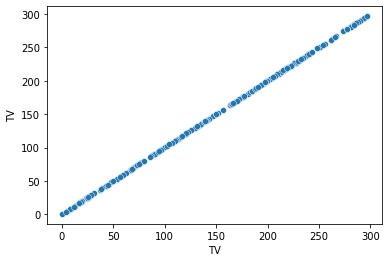

In [ ]:
sns.scatterplot(x = df['TV'], y = df['TV'])

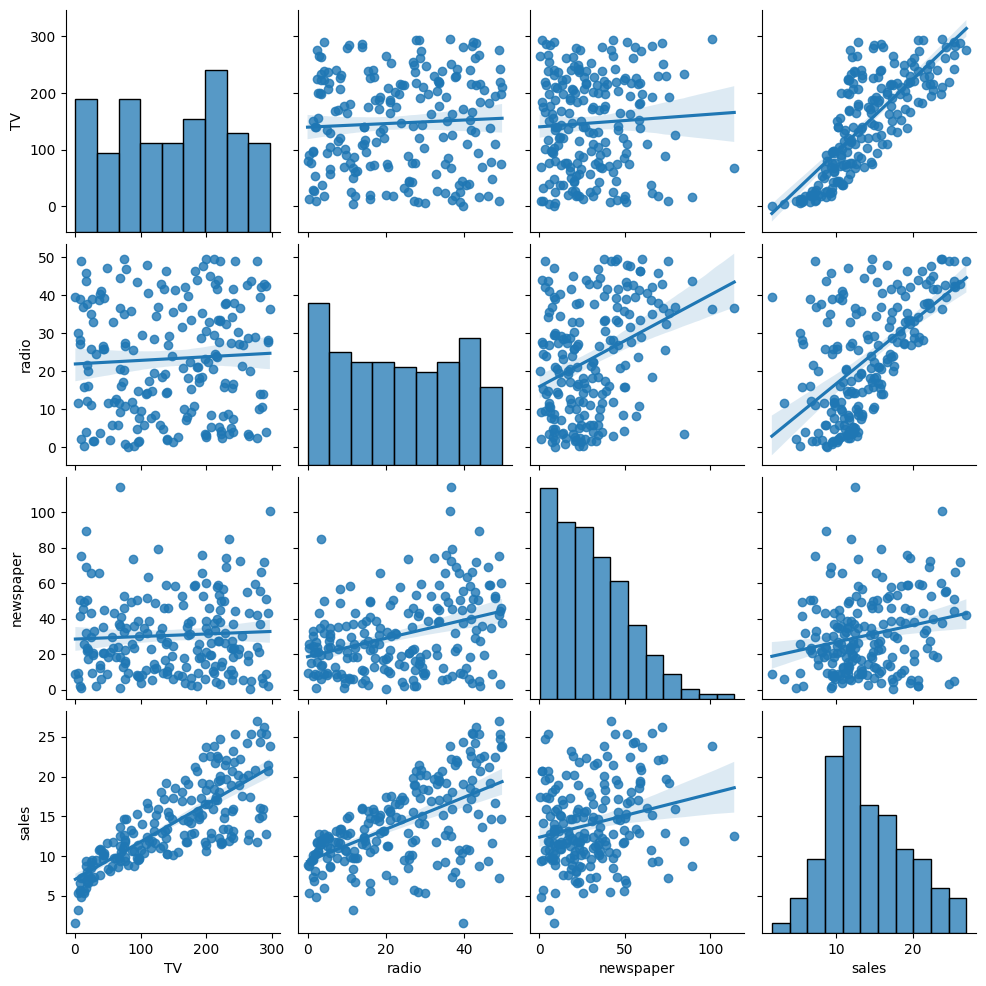

In [ ]:
sns.pairplot(df,kind='reg')

In [ ]:
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [ ]:
y[:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [ ]:
lm = sm.OLS(y,X)
model = lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.47e-42
Time:                        22:19:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = smf.ols('sales ~ TV', df)
model = lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           1.47e-42
Time:                        22:52:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [ ]:
print('Sales :' , str('%.4f' % model.params[0]) , '+ TV *' , str( '%.4f' % model.params[1]))

Sales : 7.0326 + TV * 0.0475


(-10.0, 310.0)

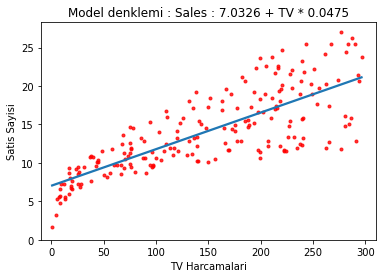

In [ ]:
g = sns.regplot(df['TV'], df['sales'],ci = None , scatter_kws = {'color' : 'r', 's':9})
g.set_title('Model denklemi : Sales : 7.0326 + TV * 0.0475')
g.set_ylabel('Satis Sayisi')
g.set_xlabel('TV Harcamalari')
plt.ylim(bottom = 0)
plt.xlim(-10,310)

In [ ]:
X = df[['TV']]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)

In [ ]:
model.predict([[30]]) 

c:\Users\ayhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [ ]:
lm = smf.ols('sales ~ TV',df)
model = lm.fit()

In [ ]:
mse = mean_squared_error(y, model.fittedvalues)

In [ ]:
mse

10.512652915656757

In [ ]:
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [ ]:
reg.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [ ]:
k_t = pd.DataFrame({'gercek_degerler' : y[:10],
                    'tahmin_ciktisi' : reg.predict(X)[:10]})

k_t

,gercek_degerler,tahmin_ciktisi
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
k_t['hata'] = k_t['gercek_degerler'] - k_t['tahmin_ciktisi']
k_t

,gercek_degerler,tahmin_ciktisi,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [ ]:
k_t['hata_kareleri'] = k_t['hata']**2
k_t

,gercek_degerler,tahmin_ciktisi,hata,hata_kareleri
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [ ]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         40 non-null     float64
 1   radio      40 non-null     float64
 2   newspaper  40 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [ ]:
y_train

,sales
79,11.0
197,12.8
38,10.1
24,9.7
122,11.6
...,...
106,7.2
14,19.0
92,19.4
179,12.6


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   40 non-null     float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [ ]:
lm = sm.OLS(y_train,X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):                   1.28e-137
Time:                        13:05:58   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [ ]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T
model.predict(yeni_veri)

c:\Users\ayhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.32334798]])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.644727765644337

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

1.78159966153345

In [ ]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.644727765644337

In [ ]:
model.score(X_train,y_train)

0.8957008271017818

In [ ]:
cross_val_score(model,X_train,y_train,cv=10,scoring='r2').mean()   

0.7913548596916338

In [ ]:
cross_val_score(model,X_test,y_test,cv=10,scoring='r2').mean()

0.7007204329162285

In [ ]:
np.sqrt(-cross_val_score(model,X_train,y_train,cv=10,scoring='neg_mean_squared_error')).mean()

1.6513523730313335

In [ ]:
np.sqrt(-cross_val_score(model,X_test,y_test,cv=10,scoring='neg_mean_squared_error')).mean()

1.846277882399709